In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


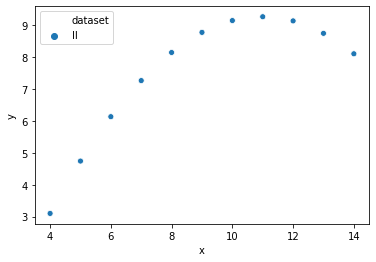

In [32]:
sns.scatterplot(x = 'x', y = 'y', data = df[df['dataset'] == 'II'], hue = 'dataset')

In [33]:
df2 = df[df['dataset'] == 'II']

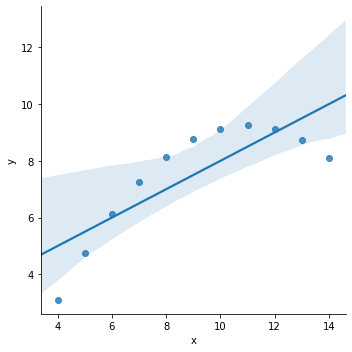

In [34]:
#plot dataset II
sns.lmplot(x = 'x', y = 'y', data = df2)

In [35]:
#Create x and y
X = df2[['x']]
y = df2['y']

In [36]:
#Build a model with polynomial features
X['x2'] = X['x']**2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
X

,x,x2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
m = LinearRegression()

In [40]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
m.score(X,y)

0.999999457857722

In [42]:
# plot the result
ypred = m.predict(X)

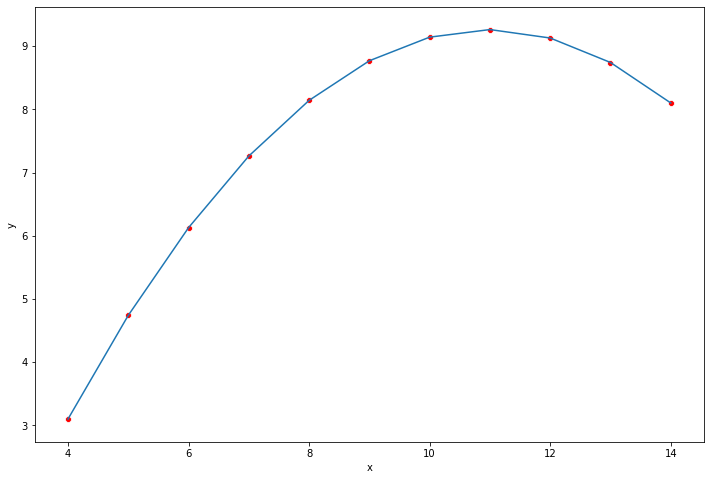

In [43]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=X['x'], y=ypred)
sns.scatterplot(x='x', y=y, data=df2, color='r')

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=0.6)
features = polynomial_features.fit_transform(df2[['x']])

In [46]:
# introduce Pipelin, make_pipelin
from sklearn.pipeline import Pipeline, make_pipeline

In [47]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

In [48]:
pipeline.fit(df2[['x']], y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [49]:
pipeline.score(df2[['x']], y)

0.999999457857722

In [24]:
# introduce or look at statsmodels.api for degree 2 and 3 poly features
import statsmodels.api as sm

In [50]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
features = polynomial_features.fit_transform(df2[['x']])

In [51]:
exog_features = sm.add_constant(X) # add constant because it is statsmodels
model = sm.OLS(y, exog_features)
results = model.fit()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           8.64e-26
Time:                        15:04:06   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9957      0.004  -1384.713      0.0

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
